# Introduction to Regression with NN in Tensorfow

There are many definitions for a regression problem, but in this notebook we'll simplify it to predicting a numerical variable based on some other combinations of variables.

In [1]:
# Import tensorflow and check GPU availability
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.16.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Creating some data to view and fit

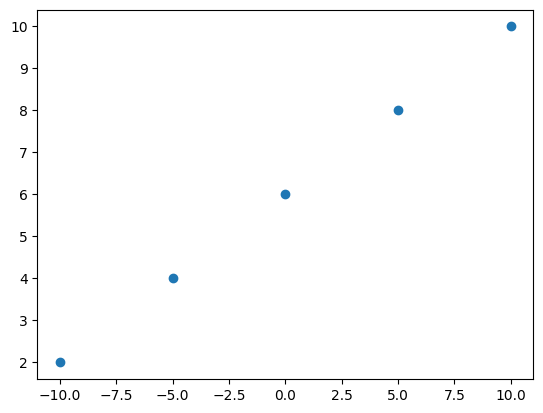

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-10.0, -5.0, 0.0, 5.0, 10.0])

# Create labels
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0])

#Visulaze it
plt.scatter(X,y)

In [3]:
# Convert Numpy arrays into Tensorflow tensors

X = tf.constant(X)
y = tf.constant(y)
X,y

2026-02-10 11:51:35.335346: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2026-02-10 11:51:35.335378: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-10 11:51:35.335389: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2026-02-10 11:51:35.335421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-10 11:51:35.335448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([-10.,  -5.,   0.,   5.,  10.])>,
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 2.,  4.,  6.,  8., 10.])>)

## Steps in modelling with tensorflow

1. **Creating a model**: Define the input and output layers, as well as the hidden layers.
2. **Compilint the model**: Define the loss function, the optimizer and the evaluation metric.
3. **Fitting a model**: Letting the model try to find patterns between the features and labels

In [4]:
# Setting a random seed for reproducebility
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # We're only implementing 1 neuron because we only want to predict 1 output value from 1 inupt value
])

"""
#Alternative
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
"""

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae stands for mean absolute error
             optimizer= tf.keras.optimizers.SGD(), #SGD stands for Stochastic Gradient Descent
         metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5


2026-02-10 11:51:35.554644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 6.0000 - mae: 6.0000
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9900 - mae: 5.9900
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9800 - mae: 5.9800
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9700 - mae: 5.9700
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9600 - mae: 5.9600


In [5]:
# Try and make a prediction with our model
model.predict(np.array([17.0])) # Scalars as inputs are not allowed, the unique valide data structure are arrays

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[5.703195]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create a model.

1. **Crearing a model**: Add more layers, increase the number of hidden units(neurons), change the activation function of each layer
2. **Compilin a model**: Change the optimization function or learning rate of the optimization function
3. **Fitting a model**: Fit a model for more epoch or more data.

**As ML scientist the goal is to run as many experiments as possible to identify what works before scaling up the models**

**The learning rate is the most important hyperparameter for NN**

In [6]:
# Setting a random seed for reproducebility
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae stands for mean absolute error
             optimizer= tf.keras.optimizers.SGD(), #SGD stands for Stochastic Gradient Descent
             metrics=["mae"])

# 3. Fitting the model (improved version by increasing epoch number)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# Try and make a prediction with our model
model.predict(np.array([17.0]))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 7.1804 - mae: 7.1804
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.0168 - mae: 7.0168
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8532 - mae: 6.8532
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.6896 - mae: 6.6896
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.5260 - mae: 6.5260
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.3624 - mae: 6.3624
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.1988 - mae: 6.1988
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.0352 - mae: 6.0352
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9520 - mae: 5.9520
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9420 - mae: 5.9420
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9320 - mae: 5.9320
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9220 - mae: 5.9220
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/st

array([[16.176805]], dtype=float32)

In [7]:
# Create a model (improved version with more layers, more neurons and relu activation)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model (improved version with adam optimizer)
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model (improved version by increasing the number of epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - loss: 6.0000 - mae: 6.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.8735 - mae: 5.8735
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.7321 - mae: 5.7321
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5732 - mae: 5.5732
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3958 - mae: 5.3958
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1990 - mae: 5.1990
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.9820 - mae: 4.9820
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7442 - mae: 4.7442
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.4848 - mae: 4.4848
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.2029 - mae: 4.2029
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.8980 - mae: 3.8980
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.5691 - mae: 3.5691
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/st

In [8]:
#Remember features and values
print(X)
print(y)
# Try and make a prediction with our model
model.predict(np.array([17.0]))

tf.Tensor([-10.  -5.   0.   5.  10.], shape=(5,), dtype=float64)
tf.Tensor([ 2.  4.  6.  8. 10.], shape=(5,), dtype=float64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[13.533329]], dtype=float32)

## Evaluating a model

In practice, the typical workflow is: 

Build model -> Loop (Fit the model -> Evaluate the model -> Tweak the model) 

It is a good idea to visualize the data, the model, the trainaing of a model and the predictions of the model.

In [9]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [10]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

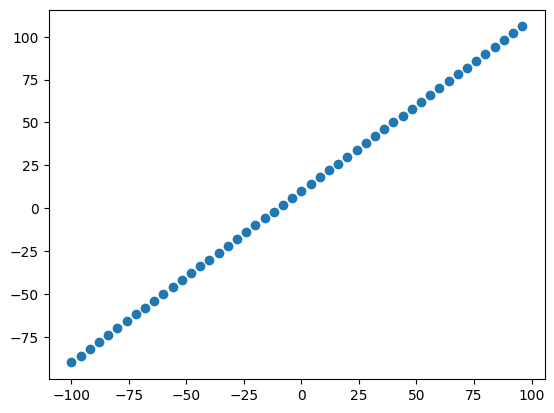

In [11]:
#Visualize the data 
import matplotlib.pyplot as plt 

plt.scatter(X,y)

### Sets 
* **Training set (70-80%)**: The model learns from this data
* **Validation data (10-15%)**: The data the model gets tuned
* **Test set (10-15%)**: Data used for the evaluation of the model

Analogy:
* Training ser: Course materials
* Validation set: Practice exam
* Test set: Final exam

The end goal is to achieve a better generalization (capability of a model to perform well on unseen data)

In [12]:
# Split the data into train and tests sets
X_train = X[:40]
y_train = y[:40] 
X_test = X[40:]
y_test = y[40:]
print(X_train,X_test, y_train,y_test)

tf.Tensor(
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56], shape=(40,), dtype=int32) tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32) tf.Tensor(
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66], shape=(40,), dtype=int32) tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


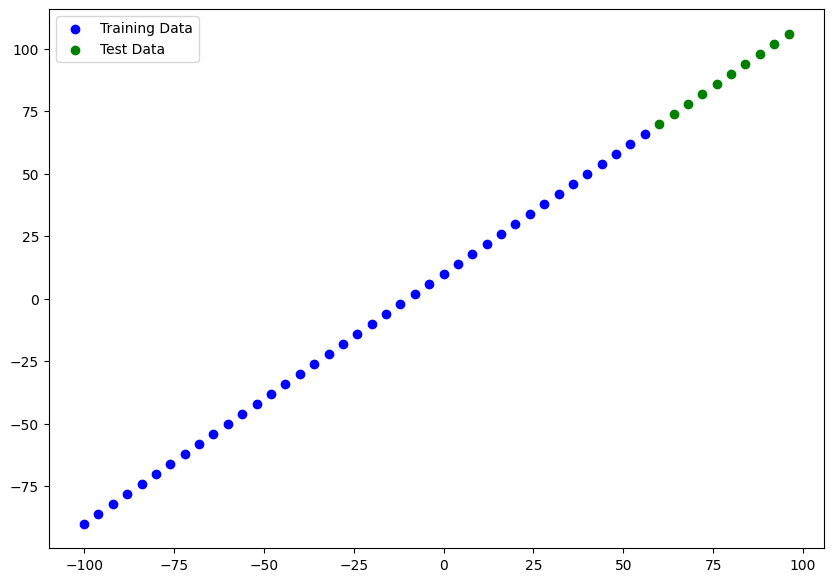

In [13]:
#Visualize the data 
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Test Data")
plt.legend()

In [14]:
# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model 
# If we instanciate the fit model separately and run it several times these ones will aggregate
model.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs=100) 

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 72.0551 - mae: 72.0551 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 37.4190 - mae: 37.4190
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2568 - mae: 9.2568
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2094 - mae: 8.2094
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8937 - mae: 9.8937
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1907 - mae: 8.1907
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8808 - mae: 9.8808
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1720 - mae: 8.1720
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8678 - mae: 9.8678
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.1533 - mae: 8.1533
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8549 - mae: 9.8549 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1346 - mae: 8.1346
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

In [15]:
# Visulize the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* Total params: Total number of parameters in the models (Train and learn)
* Trainable params: Parameters(patterns) the model can update as it trains.
* Non-trainable params: Parameters not updatesd as the model is trained

When we import a model with already learned patterns we want to keep them by freezing those layers and not training them. Important for transfer learining.

### Model improvements

When we want to improve our models it is preferable to implement many **small changes instead of a big change.** Otherwise is too complex to identify which is the root cause of the improvement

In [16]:
# Make a change to improve our model (Adjust hidden layers, optimizer and n_epochs)
# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #0.01 Makes the trainaing loss to noisy
              metrics=["mae"])

# Fit the model 
# If we instanciate the fit model separately and run it several times these ones will aggregate
model.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs=1000) # With only 100 epochs is too lees time for the model to learn properly

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 43.3840 - mae: 43.3840 
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41.3119 - mae: 41.3119
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39.2500 - mae: 39.2500
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 37.1928 - mae: 37.1928
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35.1393 - mae: 35.1393
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33.0969 - mae: 33.0969
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31.0799 - mae: 31.0799
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29.0660 - mae: 29.0660
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27.0540 - mae: 27.0540
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25.0427 - mae: 25.0427
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.0672 - mae: 23.0672
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.0942 - mae: 21.0942
Epoch 13/100

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

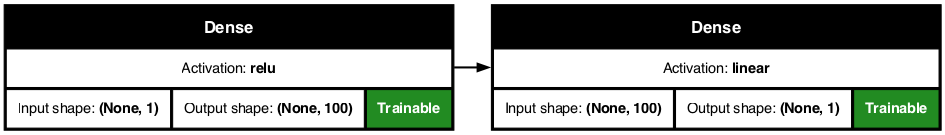

In [17]:
from tensorflow.keras.utils import plot_model
# Get a summary of the model
model.summary()

plot_model(model, show_shapes=True,
           dpi=75,
           rankdir='LR',
           show_layer_activations=True,
           show_trainable=True)

### Visualization our model predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

In [18]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred, y_test # The closer this numbers are the better our model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(array([[ 69.505775],
        [ 73.47282 ],
        [ 77.43986 ],
        [ 81.40689 ],
        [ 85.37394 ],
        [ 89.34099 ],
        [ 93.30802 ],
        [ 97.275085],
        [101.24212 ],
        [105.20916 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [19]:
# Create a plotting function 
def plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares to ground truth labels
    """

    plt.figure(figsize=(10,7))
    #Plot training data 
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    #Plot test data
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    #Plot prediction
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    #Plot legend
    plt.legend()

In [20]:
# Create a model
model_bad = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model 
model_bad.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model 
# If we instanciate the fit model separately and run it several times these ones will aggregate
model_bad.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs=100, verbose=0) 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[ 69.60879 ]
 [ 74.15791 ]
 [ 78.70704 ]
 [ 83.256165]
 [ 87.8053  ]
 [ 92.35442 ]
 [ 96.90355 ]
 [101.45268 ]
 [106.00181 ]
 [110.550934]] tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


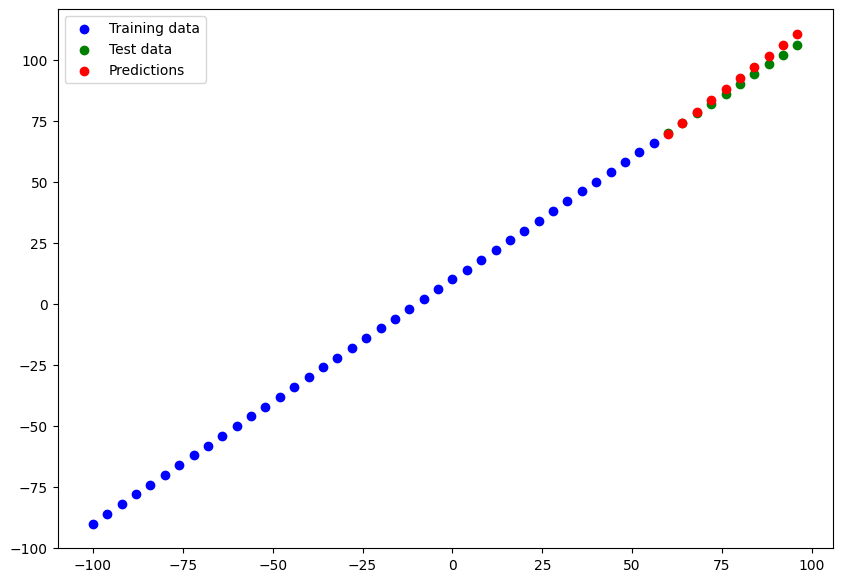

In [21]:
# Perform prediction
y_pred = model_bad.predict(X_test)
print(y_pred, y_test) # The closer this numbers are the better our model

# Visualize prediction
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred)

In [22]:
# Make a change to improve our model (Adjust hidden layers, optimizer and n_epochs)
# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #0.01 Makes the trainaing loss to noisy
              metrics=["mae"])

# Fit the model 
# If we instanciate the fit model separately and run it several times these ones will aggregate
model.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs=1000, verbose=0) # With only 100 epochs is too lees time for the model to learn properly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[ 70.48383 ]
 [ 74.516075]
 [ 78.5483  ]
 [ 82.58055 ]
 [ 86.61279 ]
 [ 90.645035]
 [ 94.67728 ]
 [ 98.709526]
 [102.74175 ]
 [106.77401 ]] tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


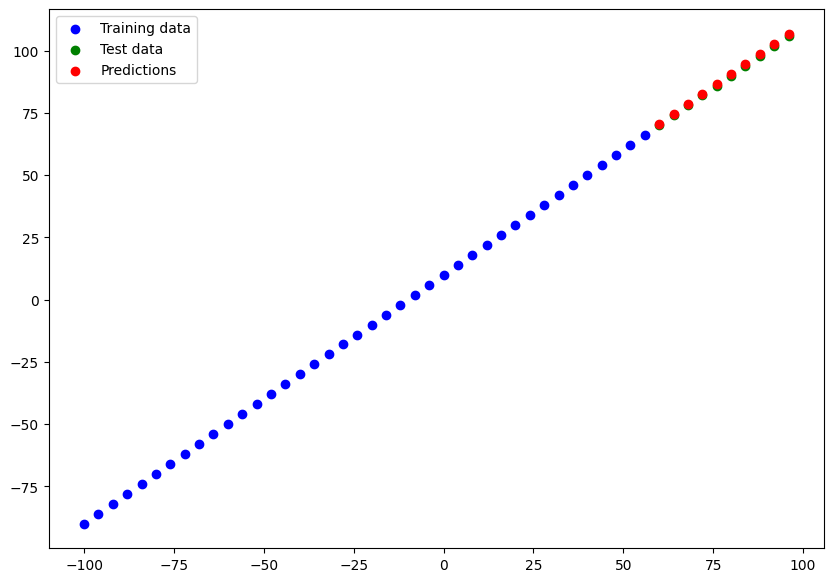

In [23]:
# Perform prediction
y_pred = model.predict(X_test)
print(y_pred, y_test) # The closer this numbers are the better our model

# Visualize prediction
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred)

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem there will be different evaluation metrics to evaluate your model's performance

On regression problems, 2 of the main metrics are:
* **MAE (Mean Absolute Error)**: Useful for any regression problems
* **MSE (Mean Square Error)**: Useful when larger errors are more significant than smaller ones
* **Huber**: Combination of MSE and MAE (Less sensitive than MSE)

In [24]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.6289 - mae: 0.6289


[0.6289154291152954, 0.6289154291152954]

In [25]:
print(y_test, y_pred,"\n") # The tensors has different shape, a conversion is required

# Calculate MAE
print(tf.keras.losses.MAE(y_test,
                          tf.reshape(y_pred, [1,10]))) 

tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32) [[ 70.48383 ]
 [ 74.516075]
 [ 78.5483  ]
 [ 82.58055 ]
 [ 86.61279 ]
 [ 90.645035]
 [ 94.67728 ]
 [ 98.709526]
 [102.74175 ]
 [106.77401 ]] 

tf.Tensor([0.6289154], shape=(1,), dtype=float32)


In [26]:
# Calculate MSE

print(tf.keras.losses.MSE(y_test,
                         tf.reshape(y_pred,[1,10])))

tf.Tensor([0.4041106], shape=(1,), dtype=float32)


In [27]:
# Make some functions to resuse MAE and MSE

def mae(test_data= y_test, predictions= y_pred):
    value = tf.keras.losses.MAE(test_data,predictions)
    print("MAE:",value)
    return value

def mse(test_data= y_test, predictions= y_pred):
    value = tf.keras.losses.MSE(test_data,predictions)
    print("MSE:",value)
    return value

def huber(test_data= y_test, predictions= y_pred):
    loss_fn = tf.keras.losses.Huber(delta=1.0)
    value = loss_fn(test_data,predictions)
    print("Huber:",value)
    return value

In [28]:
mae(y_test,tf.reshape(y_pred,[1,10]))
mse(y_test,tf.reshape(y_pred,[1,10]))
huber(y_test,tf.reshape(y_pred,[1,10]))

MAE: tf.Tensor([0.6289154], shape=(1,), dtype=float32)
MSE: tf.Tensor([0.4041106], shape=(1,), dtype=float32)
Huber: tf.Tensor(0.2020553, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=0.2020553>

### Running experiments to improve out model
1. Get more data
2. Make the model larger (more layers or more hidden units in each layer)
3. Train for longer

#### 3 Modelling experiments:
1. model 1: 1 Dense layer trained for 100 epochs
2. model_2: 2 Dense layers trained for 100 epochs
3. model_3: 2 Dense layers trained for 500 epochs

In [29]:
# Models creation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Models compile
model_1.compile(loss='mae',
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_2.compile(loss='mae',
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# Models fitting
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=0)
model_2.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=0)
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=0)

#Predictions 
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

# Evalute models
mae_1 = mae(y_test,tf.reshape(y_pred_1,[1,10])) 
mae_2 = mae(y_test,tf.reshape(y_pred_2,[1,10]))
mae_3 = mae(y_test,tf.reshape(y_pred_3,[1,10]))
print("\n")
mse_1 = mse(y_test,tf.reshape(y_pred_1,[1,10])) 
mse_2 = mse(y_test,tf.reshape(y_pred_2,[1,10]))
mse_3 = mse(y_test,tf.reshape(y_pred_3,[1,10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: tf.Tensor([1.3465583], shape=(1,), dtype=float32)
MAE: tf.Tensor([44.31883], shape=(1,), dtype=float32)
MAE: tf.Tensor([32.812096], shape=(1,), dtype=float32)


MSE: tf.Tensor([2.61443], shape=(1,), dtype=float32)
MSE: tf.Tensor([1992.6598], shape=(1,), dtype=float32)
MSE: tf.Tensor([1089.612], shape=(1,), dtype=float32)


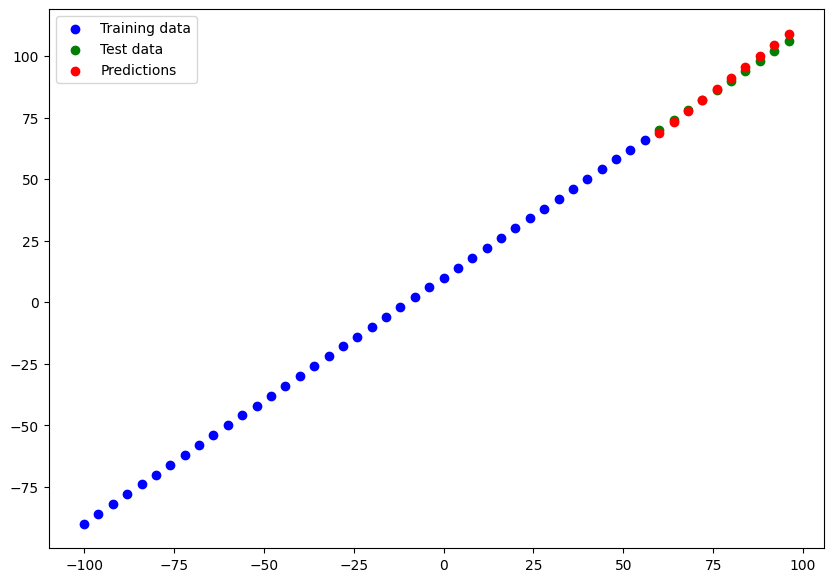

In [30]:
#Visulize data experiment 1
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred_1)

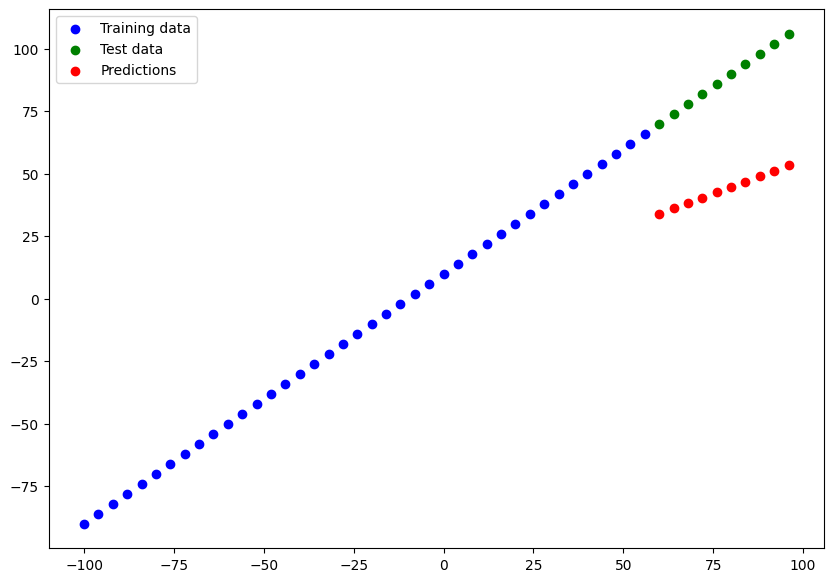

In [31]:
#Visulize data experiment 2
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred_2)

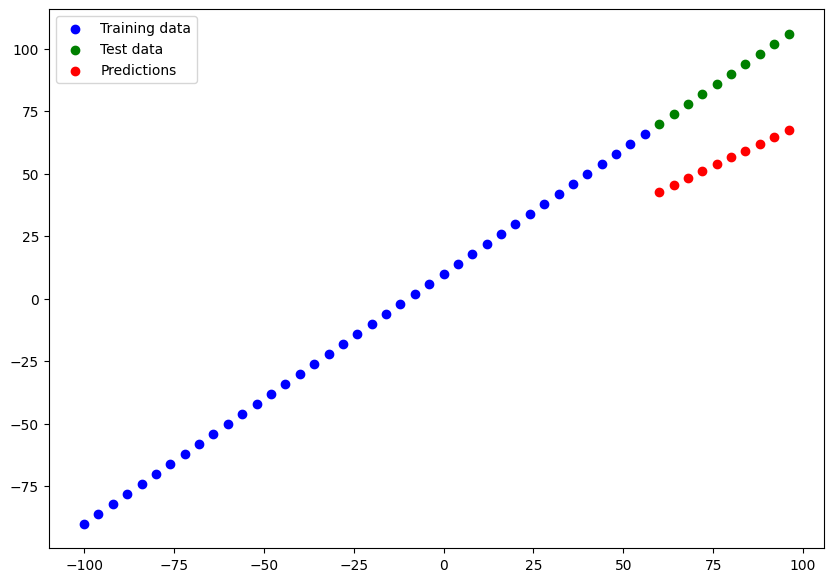

In [32]:
#Visulize data experiment 3
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred_3)

### Comparing results of our experiments
One of your main goals shourl be to minimize betweeen the experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out that does work. 

Remember the ML practitioner's motto: **Experiment,experiment,experiment...**

One really good habit in ML modelling is to track the results of your experiments. Luckly, there are tools to help us, such as:
* Tensorboard(component of tensorflow): Helps modelling experiments
* Wheights & Biases: Helps tracking all kinds of ML experiments(plug and play with Tensorboard) 


In [33]:
# Use a pandas DataFrame to compare our models
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]
                ]

all_results = pd.DataFrame(model_results, columns=["model", "mae","mse"]) 
print(all_results)

     model          mae          mse
0  model_1  [1.3465583]    [2.61443]
1  model_2   [44.31883]  [1992.6598]
2  model_3  [32.812096]   [1089.612]


### Save our models

Currently the models trained only exists as Python objects. 

Saving our models allows us to use them outside our training environment, such as web app.

There are 2 main formats:
1. SaveModel
2. HDF5

In [34]:
# Save the model in SaveModel format 
model_1.save("./models/best_SaveModel.keras") # the .keras extension is reqiured
# Save model in HDF5
model_1.save("./models/best_HDF5.h5")

In [35]:
# Load in the SavedModel model
loaded_sm = tf.keras.models.load_model("./models/best_SaveModel.keras")
loaded_sm.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [36]:
# Compare model_1 predictions with SavedModel format model predictions
pred_1 = model_1.predict(X_test)
pred_load_1 = loaded_sm.predict(X_test)
print (pred_1,pred_load_1)
pred_1 == pred_load_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ 68.65482 ]
 [ 73.13806 ]
 [ 77.6213  ]
 [ 82.10454 ]
 [ 86.587776]
 [ 91.071014]
 [ 95.55425 ]
 [100.03749 ]
 [104.52073 ]
 [109.00397 ]] [[ 68.65482 ]
 [ 73.13806 ]
 [ 77.6213  ]
 [ 82.10454 ]
 [ 86.587776]
 [ 91.071014]
 [ 95.55425 ]
 [100.03749 ]
 [104.52073 ]
 [109.00397 ]]


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [37]:

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
insurance["sex"], insurance["bmi"] 
# We need to standarize all the columns to numerical values, converting all the categorical values into numerical

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: str,
 0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64)

In [39]:
# Encode our dataset in one-hot encoding table
insurace_one_hot = pd.get_dummies(insurance, dtype=float)
insurace_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [40]:
#Create features and labels
X = insurace_one_hot.drop("charges", axis=1)
y = insurace_one_hot["charges"]

In [41]:
# View X
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [42]:
# View y
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [55]:
#Create training and test sets
import sklearn

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2, random_state=42)
print("Base:",len(X),"Train:",len(X_train))
print("Base:",len(y),"Train:",len(y_train))

Base: 1338 Train: 1070
Base: 1338 Train: 1070


In [58]:
#Build NN 

insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13171.1143 - mae: 13171.1143
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12169.7246 - mae: 12169.7246
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10098.5342 - mae: 10098.5342
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8068.0635 - mae: 8068.0635
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7456.5371 - mae: 7456.5371
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7405.2300 - mae: 7405.2300
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7364.0664 - mae: 7364.0664
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7319.0986 - mae: 7319.0986
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7274.0815 - mae: 7274.0815
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7223.7505 - mae: 7223.7505
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7173.4189 - mae: 7173.4189
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

In [59]:
# Check the results of the insurance on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3592.4028 - mae: 3592.4028


[3592.40283203125, 3592.40283203125]

In [60]:
y_test.median(), y_test.mean() #The loss values is significantly too big for the data

(8487.8803, 12968.317062869404)

In [ ]:
# Model Improvement #1 (Increase number of neurons)
insurance_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100), #The model is too complex to tain, therefore we get a nan value
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

insurance_model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━

In [91]:
# Model Improvement #2 (Add another layer)
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

insurance_model_2.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11082.5498 - mae: 11082.5498
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7506.2891 - mae: 7506.2891
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7245.2881 - mae: 7245.2881
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7063.6841 - mae: 7063.6841
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6833.2451 - mae: 6833.2451
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6599.3042 - mae: 6599.3042
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6435.9482 - mae: 6435.9482
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6299.9624 - mae: 6299.9624
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6136.9268 - mae: 6136.9268
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5941.9810 - mae: 5941.9810
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5652.7598 - mae: 5652.7598
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

In [92]:
# Check the results of the insurance on the test data
insurance_model_2.evaluate(X_test, y_test)

# The results are quite similar

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3435.9836 - mae: 3435.9836 


[3435.983642578125, 3435.983642578125]

In [95]:
# Model Improvement #2 (Add another layer)
insurance_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

history = insurance_model_3.fit(X_train,y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 12941.7480 - mae: 12941.7480
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10156.8262 - mae: 10156.8262
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7454.7158 - mae: 7454.7158
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7348.6904 - mae: 7348.6904
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7265.7749 - mae: 7265.7749
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7181.1279 - mae: 7181.1279
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7091.3813 - mae: 7091.3813
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6992.1147 - mae: 6992.1147
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6879.1494 - mae: 6879.1494
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6760.2788 - mae: 6760.2788
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6638.7002 - mae: 6638.7002
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

In [93]:
# Check the results of the insurance on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3371.7700 - mae: 3371.7700 


[3371.77001953125, 3371.77001953125]

Text(0.5, 0, 'epochs')

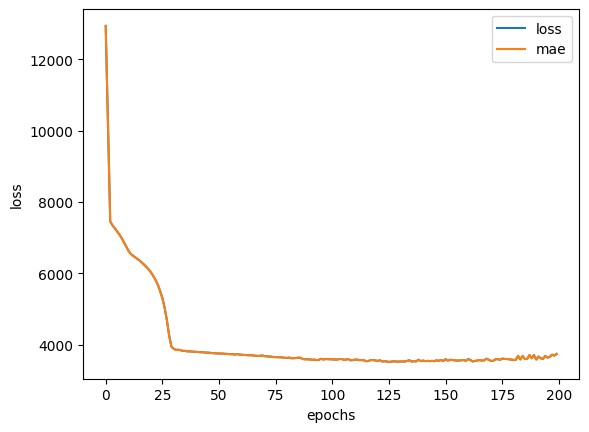

In [96]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs") 

## Preprocessing data (normalization and standarization)

In terms of scaling values, NN tend to prefer **normalization**.

(<Axes: ylabel='Frequency'>,
 <Axes: ylabel='Frequency'>,
 <Axes: ylabel='Frequency'>)

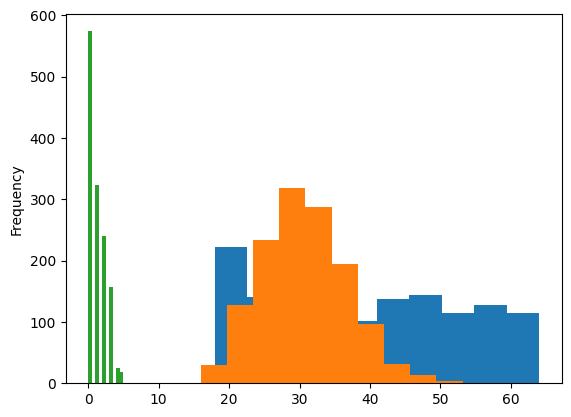

In [100]:
X["age"].plot(kind="hist"), X["bmi"].plot(kind="hist"), X["children"].plot(kind="hist")

In [127]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf


# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data we can borrow few classes from Scikit-learn

In [129]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
) 

#Create X & Y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create train and test splits
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

#Transfor training and test data with normalization (MinMaxScaler and OneHotEncoding)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [117]:
X_train, X_train_normal

(      age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1070 rows x 6 columns],
 array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.

In [133]:
# Model Improvement #2 (Add another layer)
insurance_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

history = insurance_model_3.fit(X_train_normal,y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 13316.3281 - mae: 13316.3281
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12970.0225 - mae: 12970.0225
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11401.3477 - mae: 11401.3477
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8764.9443 - mae: 8764.9443
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7883.7446 - mae: 7883.7446
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7665.4775 - mae: 7665.4775
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7434.4805 - mae: 7434.4805
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7168.6104 - mae: 7168.6104
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6843.7119 - mae: 6843.7119
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6427.2412 - mae: 6427.2412
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5860.6831 - mae: 5860.6831
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

Text(0.5, 0, 'epochs')

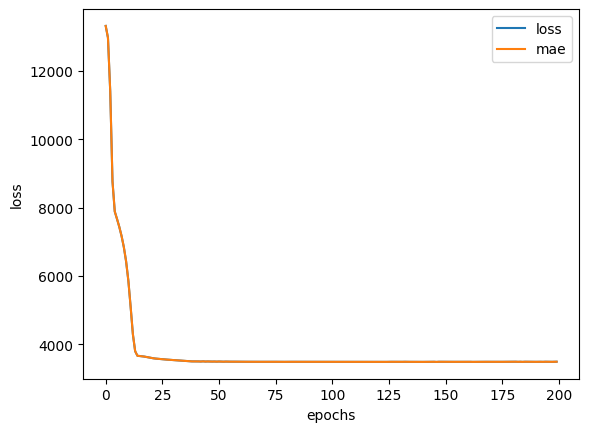

In [134]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs") 